In [2]:
import pandas as pd
import numpy as np
import helping_functions as hp
from tensorflow.keras.models import load_model
import pickle


# Loading the Data

In [3]:
df = pd.read_csv('random_testing_data.csv', header = None)
df


,0,1,2,3,4,5,6
0,2.022980,0.925559,0.455061,0.599305,0.557597,3.524226,0.0
1,-0.660340,-0.097797,0.138946,0.348711,0.451444,0.654151,0.0
2,-0.295973,0.364379,0.529857,0.679163,0.989666,0.811779,0.0
3,0.132859,0.297675,0.325755,0.195640,0.127353,1.152801,0.0
4,-0.018307,0.048564,0.263788,0.430541,0.554153,1.053613,0.0
...,...,...,...,...,...,...,...
11374,0.687887,0.561999,2.266019,1.373517,2.197732,-0.779083,2.0
11375,-1.856476,-1.870988,-1.744060,-1.613501,-1.466746,-0.779022,2.0
11376,-1.227024,-1.214191,-1.028215,-0.858204,-0.705390,-0.779506,2.0
11377,-1.612068,-1.707664,-1.362912,-1.090767,-0.896228,-0.779390,2.0


In [4]:
random_testing_data = np.array(df)


In [5]:
test_np     = random_testing_data[:,:-1]
test_labels = random_testing_data[:,-1]

# gmm


In [6]:
import pickle

# Load the saved gmm model from the file
with open('gmm_model.pkl', 'rb') as file:
    gmm_model = pickle.load(file)


In [7]:
gmm_probs = gmm_model.predict_proba(test_np)


In [8]:
gmm_probs


array([[1.75972981e-018, 1.00000000e+000, 0.00000000e+000],
       [8.91817551e-005, 9.99910818e-001, 1.91253558e-166],
       [5.14403437e-004, 9.99485597e-001, 1.24827670e-236],
       ...,
       [3.13846666e-007, 1.84804806e-005, 9.99981206e-001],
       [1.15179520e-005, 8.48758994e-004, 9.99139723e-001],
       [4.77720793e-007, 9.68323039e-007, 9.99998554e-001]])

In [9]:
input_indices = [0, 1, 2]
dict_probs = hp.shuffle_columns(input_indices, gmm_probs)

for key, value in dict_probs.items():
    print(f'Correct predictions for {key}: {hp.score_calculator(value, test_labels, test_np)}')



Correct predictions for permutation(0, 1, 2): 0.23341242639950788
Correct predictions for permutation(0, 2, 1): 0.16214078565779066
Correct predictions for permutation(1, 0, 2): 0.7289744265752702
Correct predictions for permutation(1, 2, 0): 0.502856138500747
Correct predictions for permutation(2, 0, 1): 0.26373143509974517
Correct predictions for permutation(2, 1, 0): 0.10888478776693909


In [10]:
gmm_probs = dict_probs['permutation(1, 0, 2)']


In [11]:
gmm_probs


array([[1.00000000e+000, 1.75972981e-018, 0.00000000e+000],
       [9.99910818e-001, 8.91817551e-005, 1.91253558e-166],
       [9.99485597e-001, 5.14403437e-004, 1.24827670e-236],
       ...,
       [1.84804806e-005, 3.13846666e-007, 9.99981206e-001],
       [8.48758994e-004, 1.15179520e-005, 9.99139723e-001],
       [9.68323039e-007, 4.77720793e-007, 9.99998554e-001]])

In [12]:
hp.classification_probability_displayer(gmm_probs, test_labels)


total_no_of_samples: 11379
no_of_samples_of_each_class: 3793

predicted_percentage_of_quasars: 36.33886984796555
true_percentage_of_quasars: 33.33333333333333

predicted_percentage_of_galaxies: 33.35969768872484
true_percentage_of_galaxies: 33.33333333333333

predicted_percentage_of_stars: 30.30143246330961
true_percentage_of_stars: 33.33333333333333

no_of_samples_misclassified_as_quasars: 613
samples_misclassified_as_quasars_with_probability_greater_than_0.6: 92.16965742251223
samples_misclassified_as_quasars_with_probability_greater_than_0.7: 85.31810766721044
samples_misclassified_as_quasars_with_probability_greater_than_0.8: 76.99836867862969
samples_misclassified_as_quasars_with_probability_greater_than_0.9: 58.23817292006525
samples_misclassified_as_quasars_with_probability_greater_than_0.99: 13.70309951060359

no_of_samples_correctly_classified_as_quasars: 3522
samples_correctly_classified_as_quasars_with_probability_greater_than_0.6: 99.74446337308348
samples_correctly_classif

# NN

In [13]:
from tensorflow.keras.models import load_model
# Loading the saved NN model
NN_model = load_model('NN_model.h5')


In [14]:
NN_probs = NN_model.predict(random_testing_data[:,:-1])


356/356 [==============================] - 1s 2ms/step


In [15]:
NN_probs

array([[9.99996901e-01, 3.09069696e-06, 0.00000000e+00],
       [9.98594105e-01, 1.40592398e-03, 1.86969909e-18],
       [9.97208416e-01, 2.79157190e-03, 6.88674066e-20],
       ...,
       [1.50118096e-04, 2.43363678e-02, 9.75513458e-01],
       [1.30901899e-05, 3.54235084e-03, 9.96444523e-01],
       [1.00348734e-04, 2.22905986e-02, 9.77609038e-01]], dtype=float32)

In [16]:
hp.classification_probability_displayer(NN_probs, test_labels)


total_no_of_samples: 11379
no_of_samples_of_each_class: 3793

predicted_percentage_of_quasars: 32.34027594691977
true_percentage_of_quasars: 33.33333333333333

predicted_percentage_of_galaxies: 33.94850162580191
true_percentage_of_galaxies: 33.33333333333333

predicted_percentage_of_stars: 33.71122242727832
true_percentage_of_stars: 33.33333333333333

no_of_samples_misclassified_as_quasars: 88
samples_misclassified_as_quasars_with_probability_greater_than_0.6: 79.54545454545455
samples_misclassified_as_quasars_with_probability_greater_than_0.7: 54.54545454545454
samples_misclassified_as_quasars_with_probability_greater_than_0.8: 38.63636363636363
samples_misclassified_as_quasars_with_probability_greater_than_0.9: 22.727272727272727
samples_misclassified_as_quasars_with_probability_greater_than_0.99: 2.272727272727273

no_of_samples_correctly_classified_as_quasars: 3592
samples_correctly_classified_as_quasars_with_probability_greater_than_0.6: 99.3596881959911
samples_correctly_classifi

In [17]:
print(2)
print()
3

2



3

# XGBoost

In [18]:
#import pickle

# Loading the saved XGBoost model from the file
with open('XGB_model.pkl', 'rb') as file:
    XGB_model = pickle.load(file)


In [19]:
XGB_probs = XGB_model.predict_proba(random_testing_data[:,:-1])


In [20]:
XGB_probs

array([[9.99961853e-01, 3.58147663e-05, 2.37124823e-06],
       [9.99878168e-01, 1.21534205e-04, 3.28180988e-07],
       [9.98287022e-01, 1.70965376e-03, 3.35083496e-06],
       ...,
       [5.14715225e-07, 8.68388997e-06, 9.99990821e-01],
       [1.01231069e-06, 3.70323723e-05, 9.99961972e-01],
       [6.33698505e-07, 9.12201813e-06, 9.99990225e-01]], dtype=float32)

In [21]:
hp.classification_probability_displayer(XGB_probs, test_labels)


total_no_of_samples: 11379
no_of_samples_of_each_class: 3793

predicted_percentage_of_quasars: 32.64786009315406
true_percentage_of_quasars: 33.33333333333333

predicted_percentage_of_galaxies: 33.95728974426575
true_percentage_of_galaxies: 33.33333333333333

predicted_percentage_of_stars: 33.39485016258019
true_percentage_of_stars: 33.33333333333333

no_of_samples_misclassified_as_quasars: 97
samples_misclassified_as_quasars_with_probability_greater_than_0.6: 74.22680412371135
samples_misclassified_as_quasars_with_probability_greater_than_0.7: 58.76288659793815
samples_misclassified_as_quasars_with_probability_greater_than_0.8: 45.36082474226804
samples_misclassified_as_quasars_with_probability_greater_than_0.9: 26.804123711340207
samples_misclassified_as_quasars_with_probability_greater_than_0.99: 5.154639175257731

no_of_samples_correctly_classified_as_quasars: 3618
samples_correctly_classified_as_quasars_with_probability_greater_than_0.6: 99.39192924267552
samples_correctly_classif

# RF

In [22]:
#import pickle

# Loading the saved RF model from the file
with open('RF_model.pkl', 'rb') as file:
    RF_model = pickle.load(file)


In [23]:
RF_probs = RF_model.predict_proba(random_testing_data[:,:-1])


In [24]:
RF_probs

array([[0.96, 0.04, 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ]])

In [25]:
hp.classification_probability_displayer(RF_probs, test_labels)


total_no_of_samples: 11379
no_of_samples_of_each_class: 3793

predicted_percentage_of_quasars: 32.51603831619651
true_percentage_of_quasars: 33.33333333333333

predicted_percentage_of_galaxies: 33.983654099657265
true_percentage_of_galaxies: 33.33333333333333

predicted_percentage_of_stars: 33.500307584146235
true_percentage_of_stars: 33.33333333333333

no_of_samples_misclassified_as_quasars: 86
samples_misclassified_as_quasars_with_probability_greater_than_0.6: 67.44186046511628
samples_misclassified_as_quasars_with_probability_greater_than_0.7: 50.0
samples_misclassified_as_quasars_with_probability_greater_than_0.8: 34.883720930232556
samples_misclassified_as_quasars_with_probability_greater_than_0.9: 18.6046511627907
samples_misclassified_as_quasars_with_probability_greater_than_0.99: 2.3255813953488373

no_of_samples_correctly_classified_as_quasars: 3614
samples_correctly_classified_as_quasars_with_probability_greater_than_0.6: 99.36358605423354
samples_correctly_classified_as_quas

### Loading the data

In [26]:
file_path = 'random_validation_data_pr.csv'
random_validation_data_pr = np.loadtxt(file_path, delimiter=',')
print(random_validation_data_pr)


[[ 2.113030e+01  1.940762e+01  1.892681e+01 ...  1.880476e+01
   1.329481e+00  0.000000e+00]
 [ 2.244853e+01  2.041406e+01  1.981188e+01 ...  1.917629e+01
   3.014199e+00  0.000000e+00]
 [ 2.495336e+01  2.346644e+01  2.292290e+01 ...  1.994609e+01
   1.662880e+00  0.000000e+00]
 ...
 [ 2.354228e+01  2.257988e+01  2.096861e+01 ...  1.792593e+01
  -1.374289e-04  2.000000e+00]
 [ 1.728461e+01  1.645497e+01  1.617674e+01 ...  1.601926e+01
  -9.069996e-05  2.000000e+00]
 [ 2.365113e+01  2.126964e+01  1.986834e+01 ...  1.815802e+01
  -1.934959e-05  2.000000e+00]]


In [27]:
data_points_np = random_validation_data_pr[:,:-1]
true_labels    = random_validation_data_pr[:,-1]


### Normlaizing the Data

In [28]:
# loading means for each feature
file_path = 'mean.csv'
mean = np.loadtxt(file_path, delimiter=',')
print(mean)


[21.76079309 20.48576385 19.7221195  19.27782452 19.01774536  0.7122275 ]


In [29]:
# Loading standard deviations for each feature
file_path = 'standard_deviation.csv'
std = np.loadtxt(file_path, delimiter=',')
print(std)


[2.15729241 1.94933203 1.82557934 1.77553013 1.79370263 0.91359578]


In [30]:
# normalizing the data
data_points_np_normalized = data_points_np - mean
data_points_np_normalized = data_points_np_normalized/std


In [31]:
data_points_np_normalized


array([[-0.2922613 , -0.55308374, -0.43564773, -0.15116867, -0.11874062,
         0.67563086],
       [ 0.31879633, -0.0367838 ,  0.04916823,  0.02552222,  0.08838959,
         2.51968271],
       [ 1.47989531,  1.52907566,  1.75329575,  0.90706176,  0.51755772,
         1.04056139],
       ...,
       [ 0.82579761,  1.07427371,  0.68279174, -0.12558757, -0.60869363,
        -0.77973753],
       [-2.07490791, -2.06778209, -1.9420572 , -1.80793019, -1.67167362,
        -0.77968639],
       [ 0.87625437,  0.40212552,  0.08009539, -0.30159698, -0.47930206,
        -0.77960829]])

### Loading the weights


In [32]:
file_path = 'best_weights.csv'
weights = np.loadtxt(file_path, delimiter=',')
weights


array([0.00386784, 0.02557878, 0.2786924 , 0.69186098])

### Ensemble of Models

356/356 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.97      3792
         1.0       0.97      0.97      0.97      3792
         2.0       0.99      1.00      1.00      3792

    accuracy                           0.98     11376
   macro avg       0.98      0.98      0.98     11376
weighted avg       0.98      0.98      0.98     11376

Accuracy: 0.9807489451476793
total_no_of_samples: 11376
no_of_samples_of_each_class: 3792

predicted_percentage_of_quasars: 32.955344585091424
true_percentage_of_quasars: 33.33333333333333

predicted_percentage_of_galaxies: 33.50914205344585
true_percentage_of_galaxies: 33.33333333333333

predicted_percentage_of_stars: 33.535513361462726
true_percentage_of_stars: 33.33333333333333

no_of_samples_misclassified_as_quasars: 77
samples_misclassified_as_quasars_with_probability_greater_than_0.6: 74.02597402597402
samples_misclassified_as_quasars_with_probability_

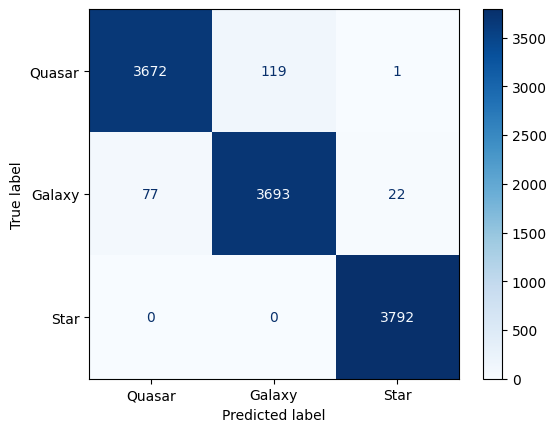

In [33]:
hp.ensemble_of_models_with_true_labels(data_points_np_normalized, true_labels, weights)


In [34]:
df = hp.ensemble_of_models_without_true_labels(data_points_np_normalized, weights)
df

356/356 [==============================] - 1s 2ms/step


,prob_of_being_Quasar,prob_of_being_Galaxy,prob_of_being_Star,predicted_label,Probability_of_Predicted_Class
sample_no.,,,,,
0,0.988456,0.011544,8.805809e-07,quasar,0.988456
1,0.982264,0.017736,3.405106e-07,quasar,0.982264
2,0.967476,0.025597,6.926800e-03,quasar,0.967476
3,0.996108,0.003892,7.552455e-08,quasar,0.996108
4,0.996018,0.003982,8.546170e-08,quasar,0.996018
...,...,...,...,...,...
11371,0.000243,0.012075,9.876817e-01,star,0.987682
11372,0.000032,0.000128,9.998401e-01,star,0.999840
11373,0.003870,0.007070,9.890600e-01,star,0.989060
